In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import os

ImportError: DLL load failed while importing _multiarray_umath: No se puede encontrar el módulo especificado.

In [2]:
df_led1 = pd.read_csv('LED_1_ESPECTRO.txt',skiprows=10,sep='\t')
df_led2 = pd.read_csv('LED_2_ESPECTRO.txt',skiprows=10,sep='\t')
df_led3 = pd.read_csv('LED_3_ESPECTRO.txt',skiprows=10,sep='\t')
df_led4 = pd.read_csv('LED_4B_ESPECTRO.txt',skiprows=10,sep='\t')
df_led5 = pd.read_csv('LED_5_ESPECTRO.txt',skiprows=10,sep='\t')
df_led6 = pd.read_csv('LED_6B_ESPECTRO.txt',skiprows=10,sep='\t')


In [3]:
# Diccionarios con los df
datasets = {
    'LED 1': df_led1,
    'LED 2': df_led2,
    'LED 3': df_led3,
    'LED 4': df_led4,
    'LED 5': df_led5,
    'LED 6': df_led6,
}

# Diccionario de colores
colores_led = {
    'LED 1': 'gray',
    'LED 2': 'red',
    'LED 3': 'magenta',
    'LED 4': 'blue',
    'LED 5': 'green',
    'LED 6': 'brown'
}

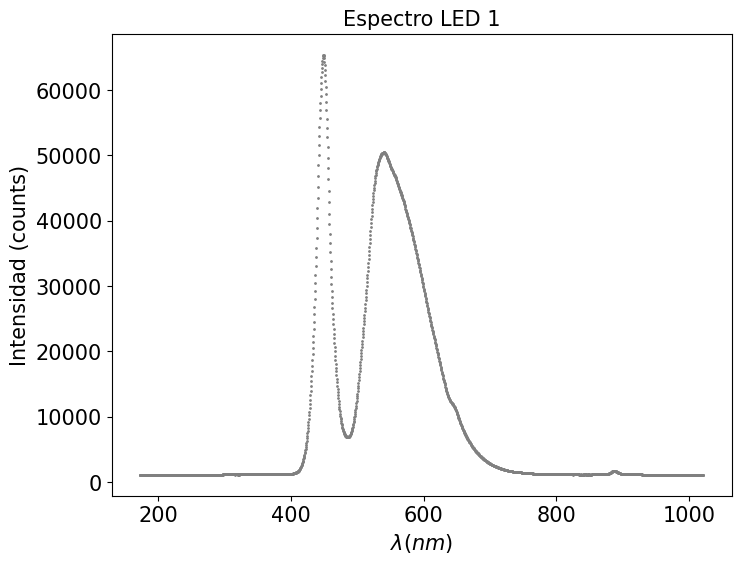

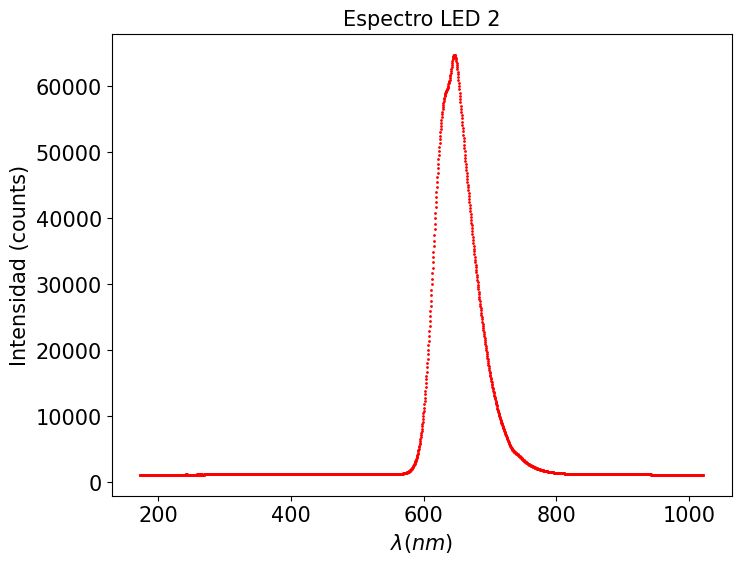

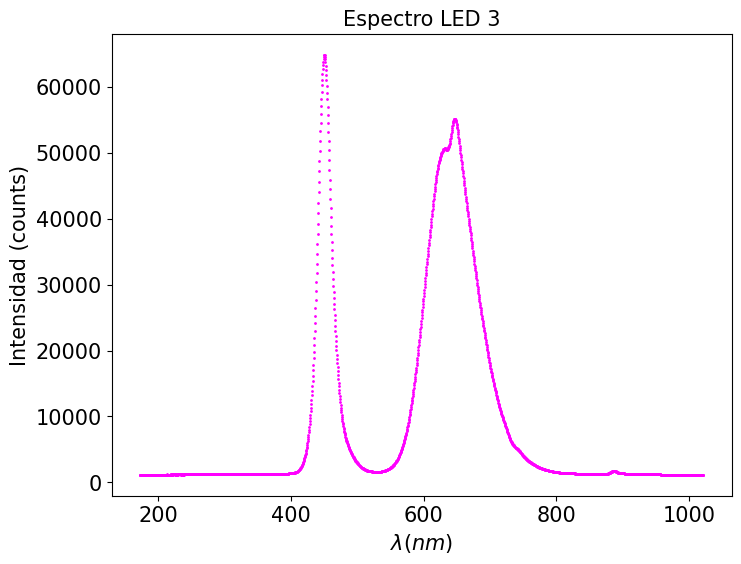

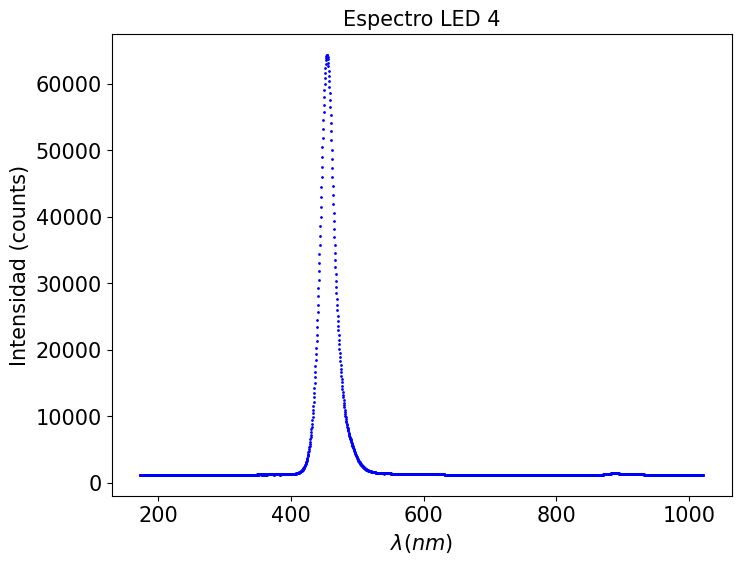

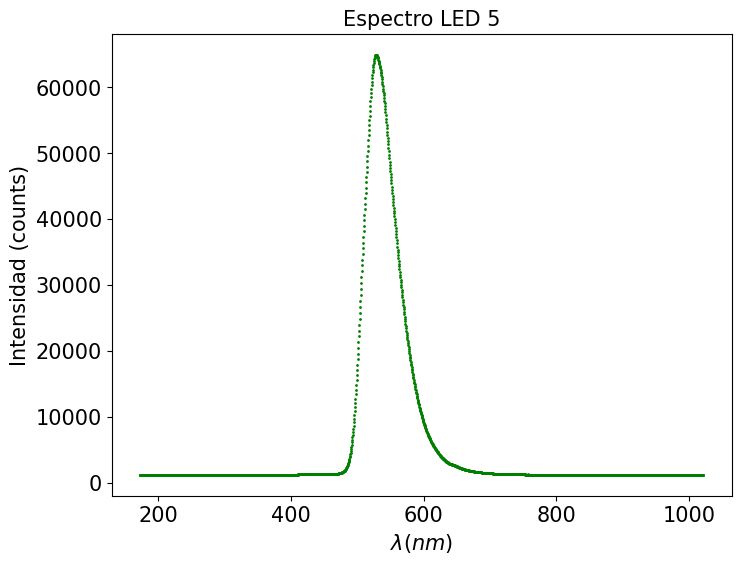

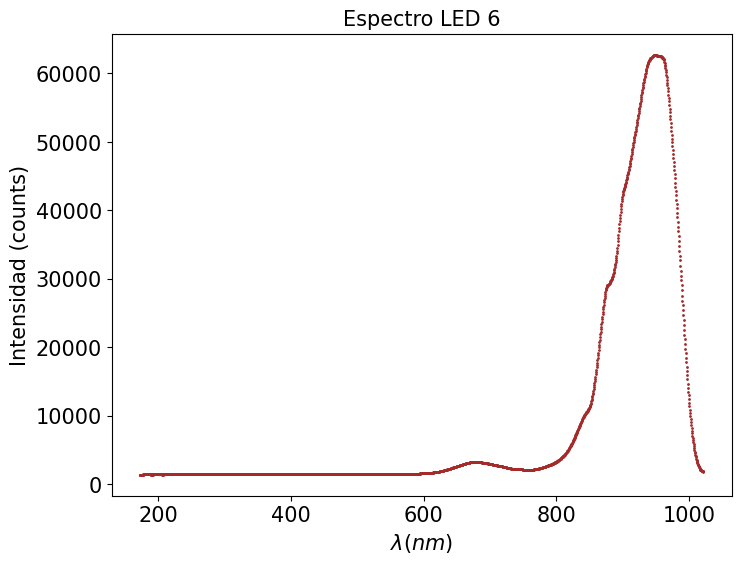

In [4]:
for key, df in datasets.items():    
    
    color_led = colores_led.get(key,'k')
    plt.figure(figsize=(8,6))
    plt.plot(df['Wavelength(nm)'],df['Intensity(Counts)'],marker='.',markersize = 2, linestyle=' ', color=color_led)
    plt.title(f'Espectro {key}', fontsize=15)
    plt.xlabel('$\lambda (nm)$',fontsize=15)
    plt.ylabel('Intensidad (counts)',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    #plt.show()
plt.show()

LED 1: Máximo en 448.87 nm, FWHM = 22.84 nm
LED 2: Máximo en 646.03 nm, FWHM = 65.67 nm
LED 3: Máximo en 450.09 nm, FWHM = 24.17 nm
LED 4: Máximo en 454.15 nm, FWHM = 25.06 nm
LED 5: Máximo en 528.20 nm, FWHM = 56.75 nm
LED 6: Máximo en 949.35 nm, FWHM = 100.10 nm


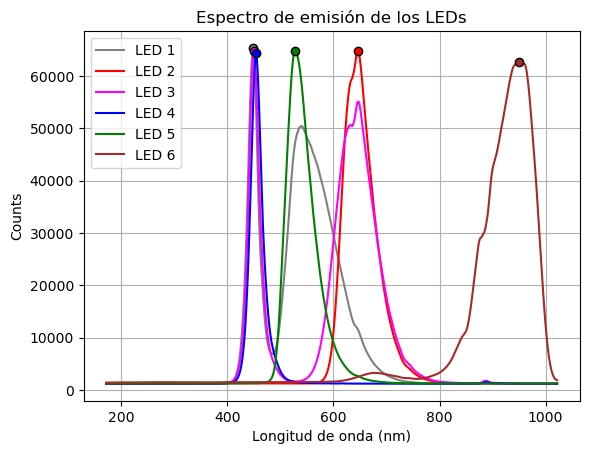

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_maximo_y_fwhm(df):
    """
    Calcula la longitud de onda del máximo y la anchura a media altura (FWHM).
    """
    # Extraer datos
    longitudes = df['Wavelength(nm)']
    counts = df['Intensity(Counts)']
    
    # Encontrar el índice del máximo
    idx_max = np.argmax(counts)
    lambda_max = longitudes[idx_max]  # Longitud de onda del máximo
    
    # Calcular la anchura a media altura (FWHM)
    half_max = counts[idx_max] / 2
    
    # Buscar los puntos donde la curva cruza el valor half_max
    indices_izq = np.where(counts[:idx_max] < half_max)[0]
    indices_der = np.where(counts[idx_max:] < half_max)[0] + idx_max
    
    if len(indices_izq) > 0 and len(indices_der) > 0:
        lambda_izq = np.interp(half_max, [counts[indices_izq[-1]], counts[indices_izq[-1] + 1]], 
                               [longitudes[indices_izq[-1]], longitudes[indices_izq[-1] + 1]])
        
        lambda_der = np.interp(half_max, [counts[indices_der[0] - 1], counts[indices_der[0]]], 
                               [longitudes[indices_der[0] - 1], longitudes[indices_der[0]]])
        
        fwhm = lambda_der - lambda_izq
    else:
        fwhm = None  # Si no se puede calcular FWHM

    return lambda_max, fwhm

# Diccionario para almacenar los resultados
resultados = {}

# Calcular para cada LED
for key, df in datasets.items():
    lambda_max, fwhm = calcular_maximo_y_fwhm(df)
    resultados[key] = {'Max': lambda_max, 'FWHM': fwhm}

    # Graficar cada espectro con el punto máximo
    plt.plot(df['Wavelength(nm)'], df['Intensity(Counts)'], color=colores_led.get(key, 'k'), label=key)
    plt.scatter(lambda_max, df['Intensity(Counts)'].max(), color=colores_led.get(key, 'k'), edgecolor='black', zorder=3)

# Mostrar resultados
for key, values in resultados.items():
    print(f"{key}: Máximo en {values['Max']:.2f} nm, FWHM = {values['FWHM']:.2f} nm")

# Mostrar gráfico
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Counts')
plt.title('Espectro de emisión de los LEDs')
plt.legend()
plt.grid()
plt.show()


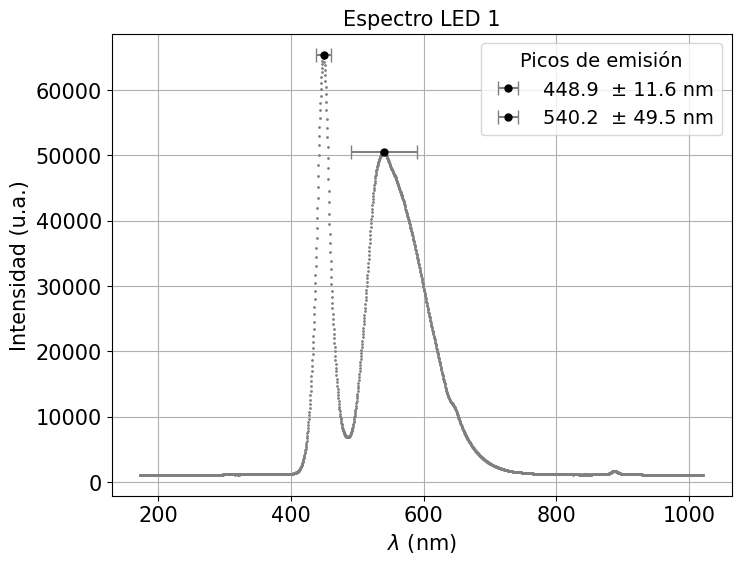

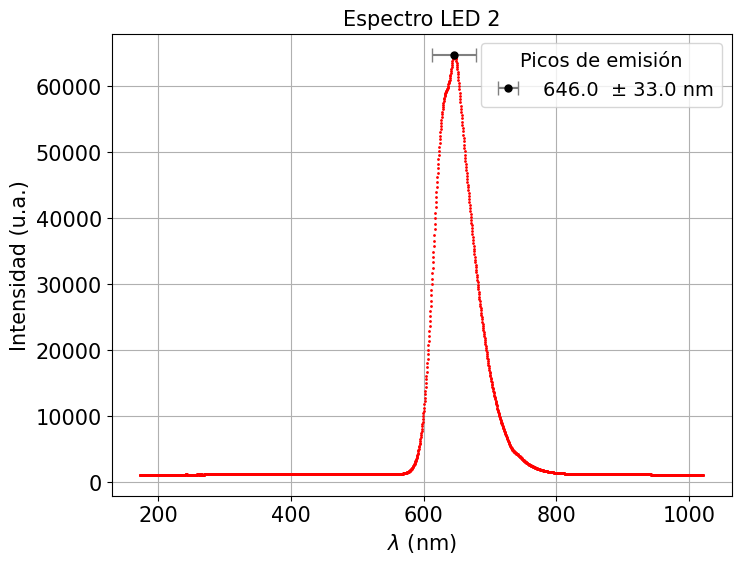

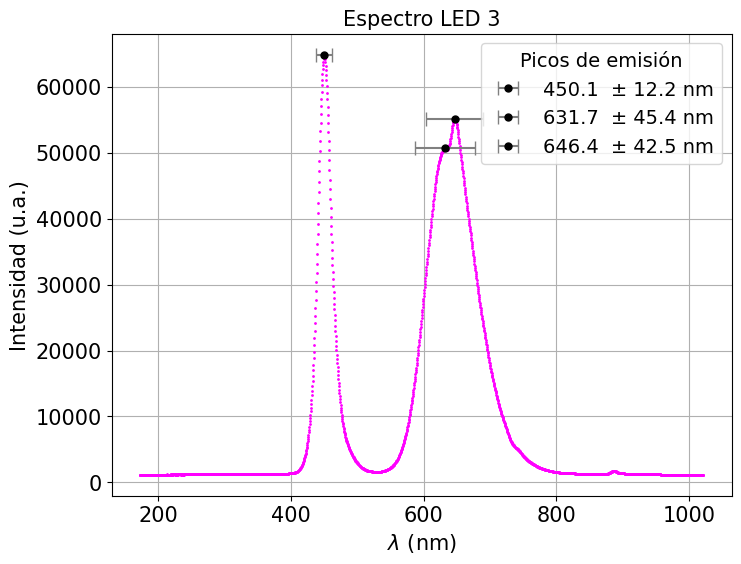

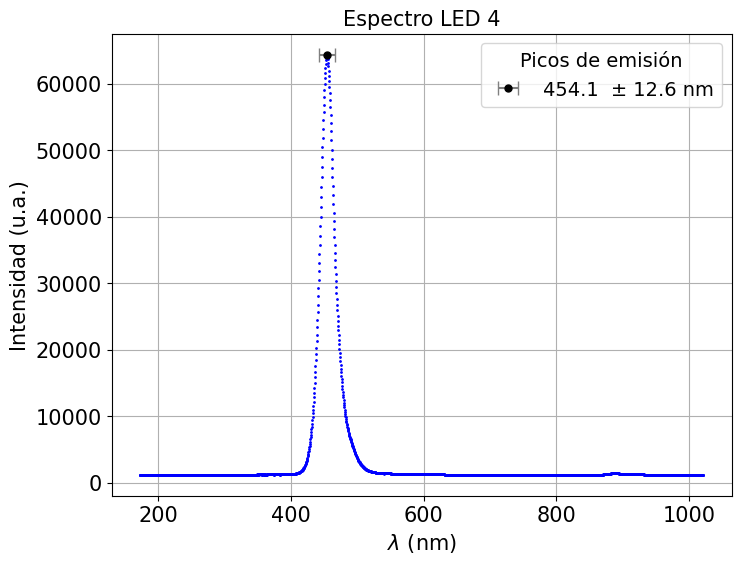

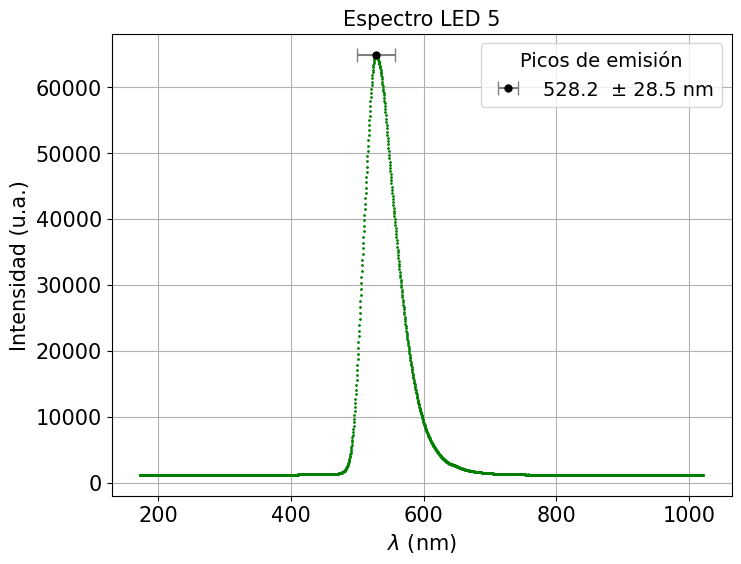

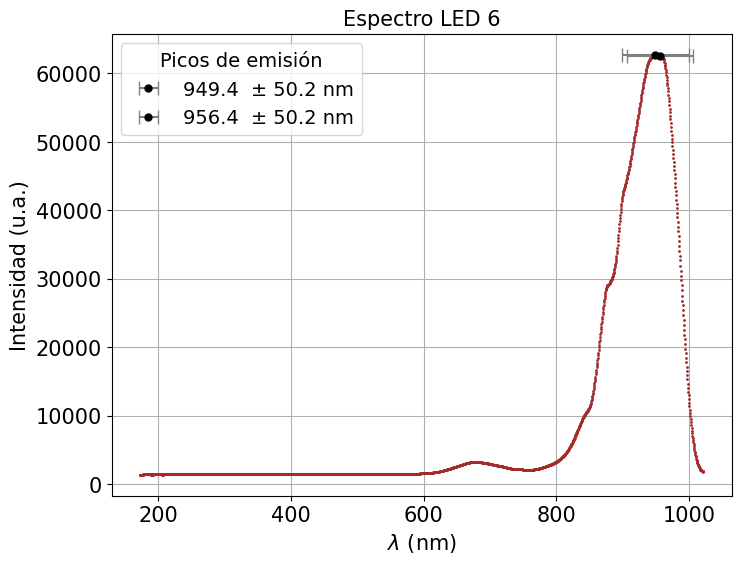

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Umbral de intensidad para considerar picos
umbral_intensidad = 0.1  # 10% del máximo, ajusta si quieres

for key, df in datasets.items():    
    color_led = colores_led.get(key, 'k')
    
    # Normalizar la intensidad
    intensidad_norm = df['Intensity(Counts)'] / df['Intensity(Counts)'].max()
    
    # Encontrar picos
    indices_picos, _ = find_peaks(intensidad_norm, height=umbral_intensidad)

    longitudes_picos = df['Wavelength(nm)'].iloc[indices_picos].values
    intensidades_picos = df['Intensity(Counts)'].iloc[indices_picos].values
    
    FWHMs = []
    for idx_pico in indices_picos:
        intensidad_pico = df['Intensity(Counts)'].iloc[idx_pico]
        media_altura = intensidad_pico / 2

        # Buscar la izquierda
        izquierda = idx_pico
        while izquierda > 0 and df['Intensity(Counts)'].iloc[izquierda] > media_altura:
            izquierda -= 1

        # Buscar la derecha
        derecha = idx_pico
        while derecha < len(df)-1 and df['Intensity(Counts)'].iloc[derecha] > media_altura:
            derecha += 1

        fwhm = df['Wavelength(nm)'].iloc[derecha] - df['Wavelength(nm)'].iloc[izquierda]
        FWHMs.append(fwhm)

    # Graficar el espectro
    plt.figure(figsize=(8,6))
    plt.plot(df['Wavelength(nm)'], df['Intensity(Counts)'], marker='.', markersize=2, linestyle=' ', color=color_led)
    plt.title(f'Espectro {key}', fontsize=15)
    plt.xlabel('$\lambda$ (nm)', fontsize=15)
    plt.ylabel('Intensidad (u.a.)', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    # Dibujar los picos y preparar las etiquetas de leyenda
    etiquetas_picos = []
    for wl_pico, inten_pico, fwhm in zip(longitudes_picos, intensidades_picos, FWHMs):
        plt.errorbar(wl_pico, inten_pico, xerr=fwhm/2, fmt='o', color='black', 
                     ecolor='gray', capsize=5, markersize=5, label=f'{wl_pico:.1f}  ± {fwhm/2:.1f} nm')

    # Crear la leyenda
    plt.legend(title='Picos de emisión', fontsize=14, title_fontsize=14, loc='best')
    plt.grid(True)

plt.show()


LED LED 1 - Longitud de onda efectiva: 488.63 nm intensidad [65400 50472]
LED LED 1 - Longitud de onda efectiva: 488.63 + 28.093734413835975 nm
LED LED 2 - Longitud de onda efectiva: 646.03 nm intensidad [64816]
LED LED 2 - Longitud de onda efectiva: 646.03 + 33.019000000000005 nm
LED LED 3 - Longitud de onda efectiva: 567.45 nm intensidad [64860 50660 55131]
LED LED 3 - Longitud de onda efectiva: 567.45 + 31.819820654142056 nm
LED LED 4 - Longitud de onda efectiva: 454.15 nm intensidad [64354]
LED LED 4 - Longitud de onda efectiva: 454.15 + 12.595199999999977 nm
LED LED 5 - Longitud de onda efectiva: 528.20 nm intensidad [64888]
LED LED 5 - Longitud de onda efectiva: 528.20 + 28.460949999999997 nm
LED LED 6 - Longitud de onda efectiva: 952.87 nm intensidad [62734 62539]
LED LED 6 - Longitud de onda efectiva: 952.87 + 50.15509999999995 nm


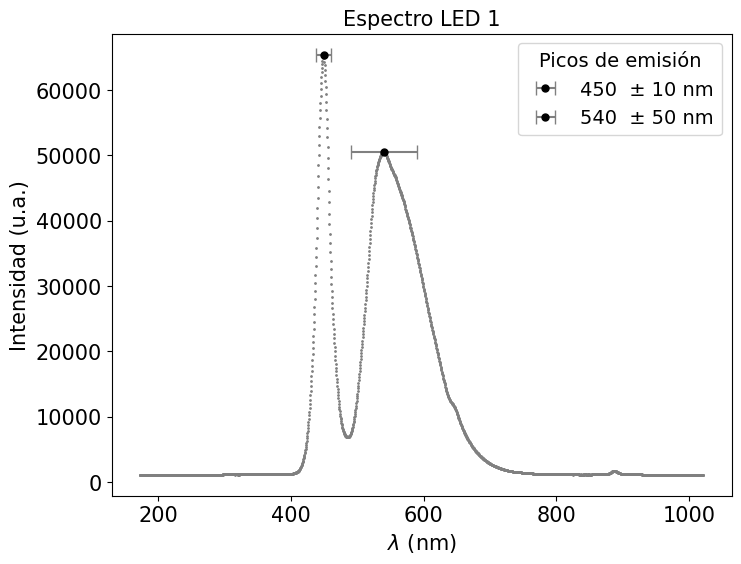

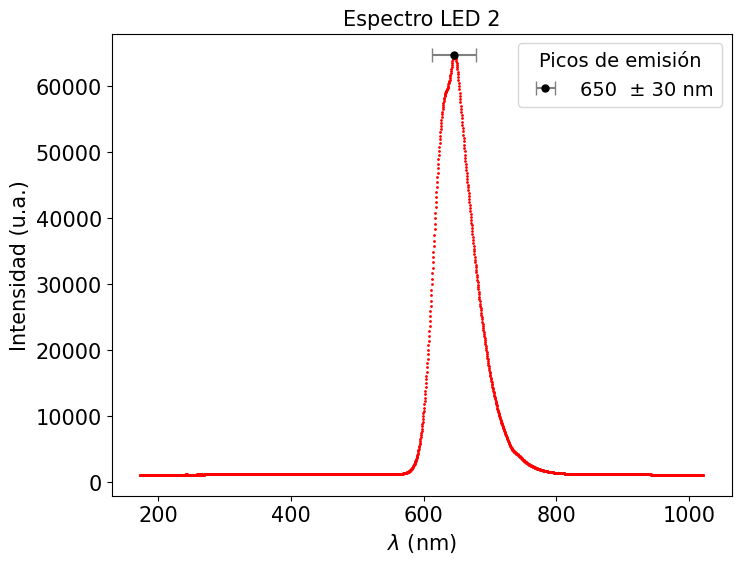

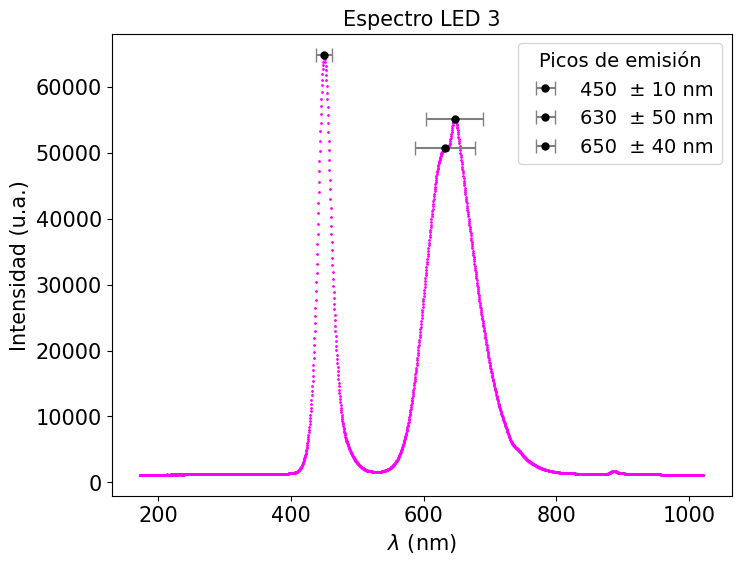

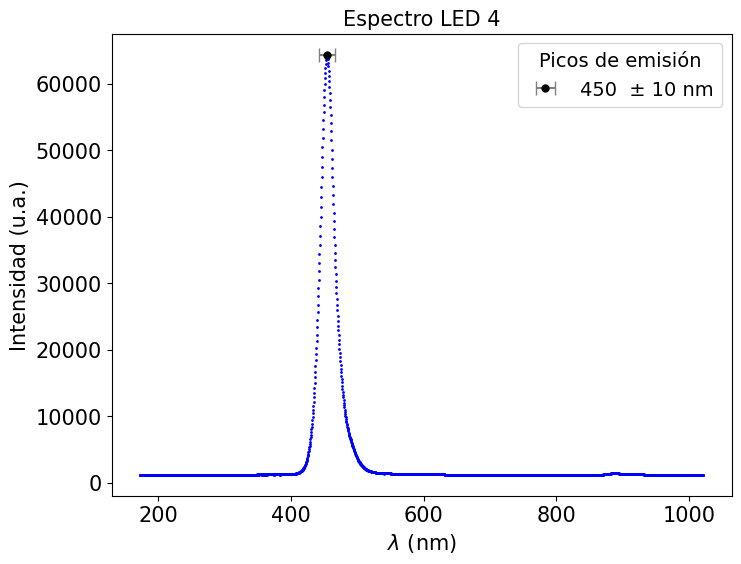

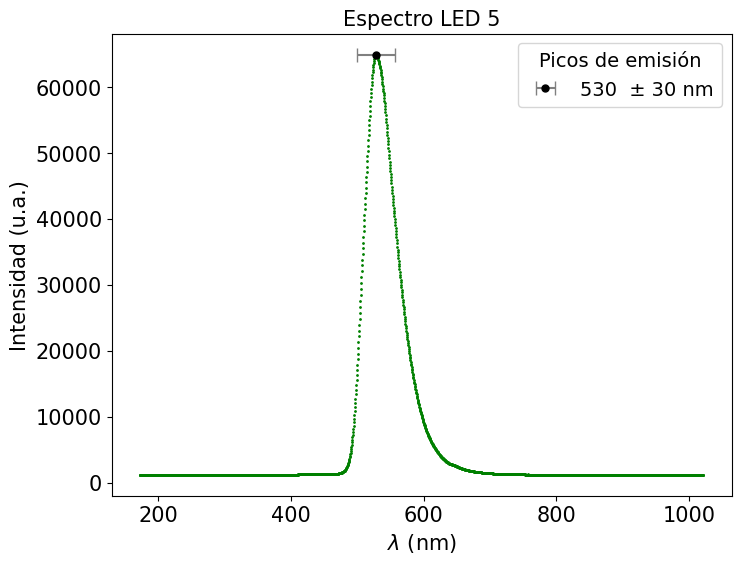

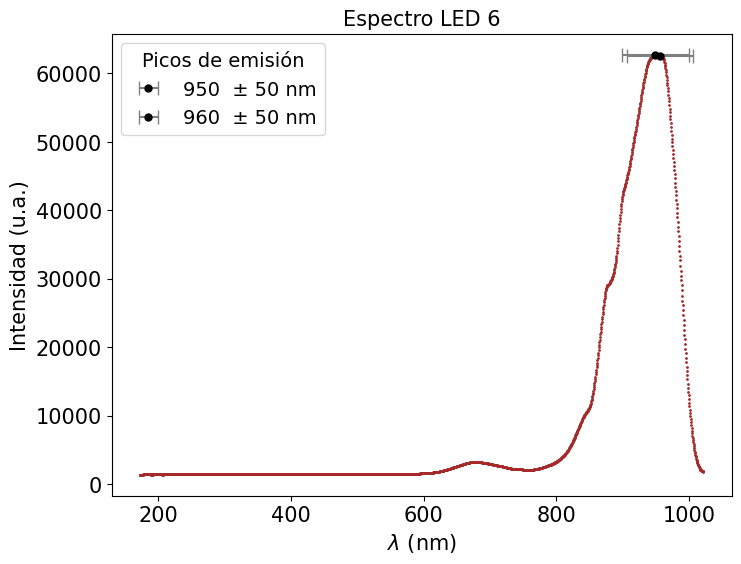

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Umbral de intensidad para considerar picos
umbral_intensidad = 0.1  # 10% del máximo, ajusta si quieres

for key, df in datasets.items():    
    color_led = colores_led.get(key, 'k')
    
    # Normalizar la intensidad
    intensidad_norm = df['Intensity(Counts)'] / df['Intensity(Counts)'].max()
    
    # Encontrar picos
    indices_picos, _ = find_peaks(intensidad_norm, height=umbral_intensidad)

    longitudes_picos = df['Wavelength(nm)'].iloc[indices_picos].values
    intensidades_picos = df['Intensity(Counts)'].iloc[indices_picos].values
    
    # Calcular longitud de onda efectiva (media ponderada por intensidad)
    lambda_efectiva = np.sum(longitudes_picos * intensidades_picos) / np.sum(intensidades_picos)
    
    print(f"LED {key} - Longitud de onda efectiva: {lambda_efectiva:.2f} nm intensidad {intensidades_picos}")
    
    FWHMs = []
    for idx_pico in indices_picos:
        intensidad_pico = df['Intensity(Counts)'].iloc[idx_pico]
        media_altura = intensidad_pico / 2

        # Buscar la izquierda
        izquierda = idx_pico
        while izquierda > 0 and df['Intensity(Counts)'].iloc[izquierda] > media_altura:
            izquierda -= 1

        # Buscar la derecha
        derecha = idx_pico
        while derecha < len(df)-1 and df['Intensity(Counts)'].iloc[derecha] > media_altura:
            derecha += 1

        fwhm = df['Wavelength(nm)'].iloc[derecha] - df['Wavelength(nm)'].iloc[izquierda]
        FWHMs.append(fwhm)
    errores= np.array(FWHMs)
    error_efectivo = np.sum(errores * intensidades_picos) / np.sum(intensidades_picos)
    print(f"LED {key} - Longitud de onda efectiva: {lambda_efectiva:.2f} + {error_efectivo/2} nm")
    # Graficar el espectro
    plt.figure(figsize=(8,6))
    plt.plot(df['Wavelength(nm)'], df['Intensity(Counts)'], marker='.', markersize=2, linestyle=' ', color=color_led)
    plt.title(f'Espectro {key}', fontsize=15)
    plt.xlabel('$\lambda$ (nm)', fontsize=15)
    plt.ylabel('Intensidad (u.a.)', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    # Dibujar los picos y preparar las etiquetas de leyenda
    for wl_pico, inten_pico, fwhm in zip(longitudes_picos, intensidades_picos, FWHMs):
        plt.errorbar(wl_pico, inten_pico, xerr=fwhm/2, fmt='o', color='black', 
                     ecolor='gray', capsize=5, markersize=5, label=f'{int(round(wl_pico,-1))}  ± {int(round(fwhm/2,-1))} nm')

    # Crear la leyenda
    plt.legend(title='Picos de emisión', fontsize=14, title_fontsize=14, loc='best')
    plt.grid(False)

plt.show()
